# Particle Filter

Ce notebook présente l'utilisation du fichier `pf.py` pour assimiler des données

On commence par importer le module en question, ainsi que `numpy` pour préparer des observations fictivs et `DateTime` pour créer des dates.


In [1]:
from PfWoFost import PfWoFost
import numpy as np
import datetime as dt
import pandas as pd
import pcse
from pcse.models import Wofost72_WLP_FD

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

On créé ensuite des observations : ici, il faudra mettre les observations receuilli par le robot. Pour l'instant, le code prend en compte les données pour "LAI" et "SM"

In [2]:
# Commençons par générer des observations
from dataproviders import parameters, agromanagement, weather
wofost = Wofost72_WLP_FD(parameters,weather,agromanagement)
wofost.run_till_terminate()

df_reality = pd.DataFrame(wofost.get_output())
df_reality = df_reality.set_index("day")

obs = df_reality.sample(n=5).sort_index()
dates_of_observation = obs.index
print(dates_of_observation)
observed_lai = np.array(obs['LAI'])
observed_sm = np.array(obs['SM'])
obs_pack = [(dates_of_observation[i],observed_lai[i],observed_sm[i]) for i in range(5)]

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

Index([2000-01-23, 2000-01-26, 2000-03-29, 2000-04-27, 2000-05-24], dtype='object', name='day')


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

On créé ensuite une zone de recherche autour des paramètres que l'on cherche à assimiler.

In [3]:

# Créons une zone d'incertitude autour des paramètres
range1=(150.,50.)
range2=(4.5,1.5)
range3=(31,3)
range4=(0.31,0.03)

Finalement, on peut créer et faire tourner notre modèle:

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth


=====[Assimilate] Currently on observation 1/5 with 100 particles
[Assimilate] Updated weights. Current LAI estimate:  (0.4309940772739113, 0.015049164280593096)

=====[Assimilate] Currently on observation 2/5 with 100 particles
[Assimilate] Updated weights. Current LAI estimate:  (0.518286373980865, 0.019762062810357587)

=====[Assimilate] Currently on observation 3/5 with 100 particles


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

[Assimilate] Updated weights. Current LAI estimate:  (2.979206071659731, 0.866867915823777)

=====[Assimilate] Currently on observation 4/5 with 100 particles
[Assimilate] Updated weights. Current LAI estimate:  (2.0733190516813864, 0.9291158934185724)

=====[Assimilate] Currently on observation 5/5 with 100 particles
[Assimilate] Updated weights. Current LAI estimate:  (0.010668123918307354, 0.0008428120948721862)


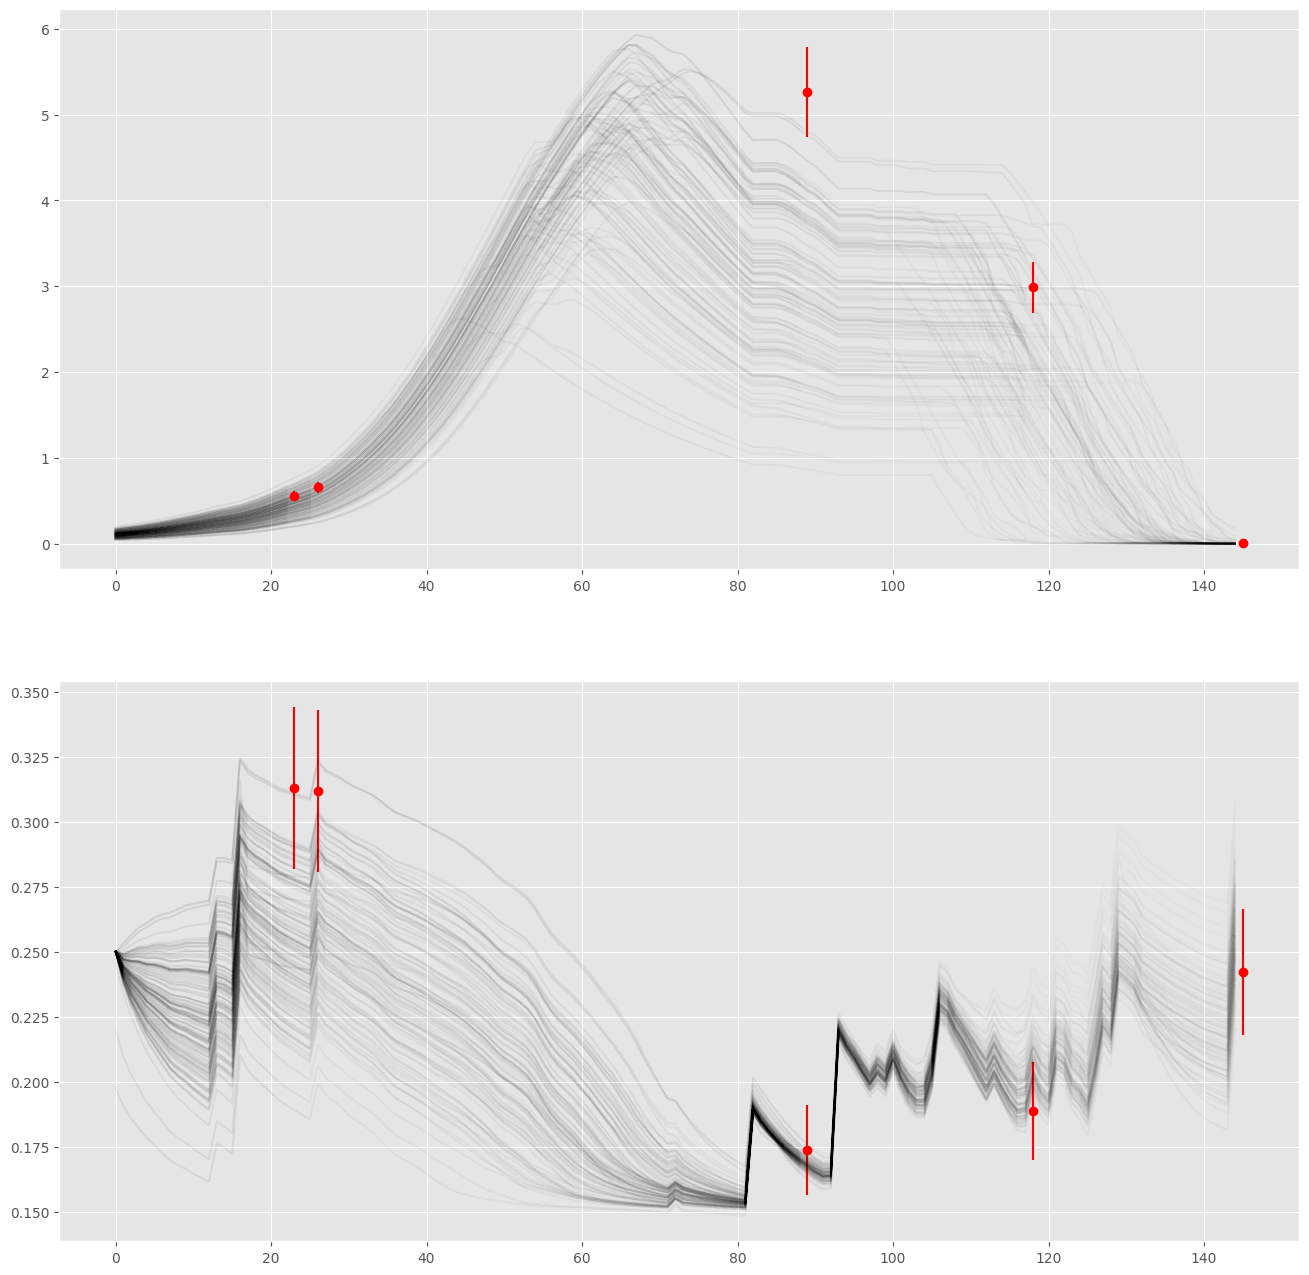

In [4]:

# Appelons maintenant le filtre particulaire
N   = 100
pf  = PfWoFost(ensemble_size=N,
              override_parameters=("TDWI","WAV","SPAN","SMFCF"),
              override_ranges=(range1,range2,range3,range4))
start_date = pf.get_current_date()
pf.get_particles_last_value()
pf.assimilate(obs_pack)

On peut représenter l'ensemble des particules afin de voir leur différences

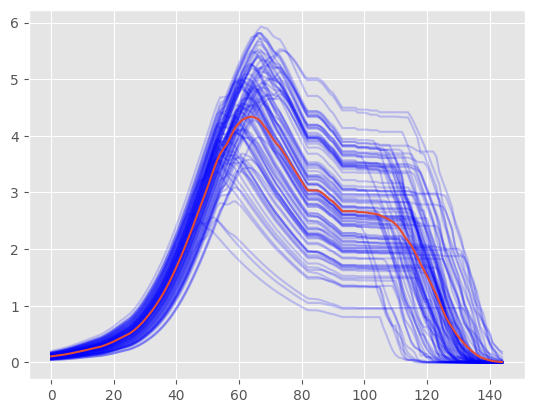

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
sum = pd.DataFrame()
for element in pf.particle_set:
    sum[element] = pd.DataFrame(element.get_output())['LAI']
    plt.plot(pd.DataFrame(element.get_output())['LAI'],alpha=0.2,color='blue')

# courbe moyenne (supposément la vraie valeur)
plt.plot(sum.sum(axis=1)/len(pf.particle_set))


Comparons avec les données observées :

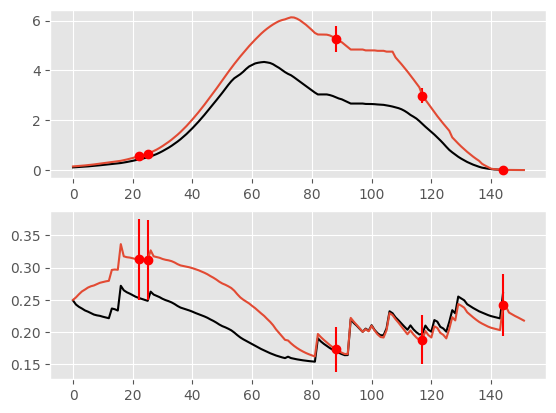

In [6]:
fig, ax = plt.subplots(2,1)

pf.avg(plot=True,obs_list=obs_pack,fig=fig,ax=ax)
ax[0].plot(list(df_reality['LAI']))
ax[1].plot(list(df_reality['SM']))
